In [1]:
import os

In [26]:
os.getcwd()

'/Users/evgeniyburovik/education/texi_peru_pr'

In [27]:
os.listdir()

['.DS_Store', 'texi_peru_proj.ipynb', '3_taxi_peru.csv', '.ipynb_checkpoints']

In [28]:
path = os.getcwd()+'/'+os.listdir()[2]
path

'/Users/evgeniyburovik/education/texi_peru_pr/3_taxi_peru.csv'

In [29]:
numbers = [1, -2, 3, 0, -3, 2]

In [30]:
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    if i > 0:
        positive_numbers.append(i)

In [31]:
import pandas as pd
taxi = pd.read_csv(path, sep = ';', parse_dates=['end_at', 'start_at', 'arrived_at'])
status = ['asap', 'reserved']
taxi = taxi.query('start_type in @status')

In [32]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [33]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at

In [34]:
taxi.dtypes

journey_id                   object
user_id                      object
driver_id                    object
taxi_id                      object
icon                         object
start_type                   object
start_at             datetime64[ns]
start_lat                    object
start_lon                    object
end_at               datetime64[ns]
end_lat                      object
end_lon                      object
end_state                    object
driver_start_lat             object
driver_start_lon             object
arrived_at           datetime64[ns]
source                       object
driver_score                float64
rider_score                 float64
wait_time           timedelta64[ns]
dtype: object

In [35]:
taxi.start_type.value_counts()

asap        14865
reserved     8226
Name: start_type, dtype: int64

In [12]:
taxi.wait_time = taxi.wait_time.astype('timedelta64[m]')

In [13]:
taxi.query('start_type in "reserved" and wait_time > 0.0')\
.groupby('driver_id', as_index=False)\
.agg({'wait_time' : 'count' })\
.sort_values('wait_time', ascending = False)

,driver_id,wait_time
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


In [14]:
from datetime import datetime
# Импортируем билилиотеку работы с датой для записи дня недели
taxi['month'] = taxi.start_at.dt.month
# Создаем колонку пользуясь атрибутом dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')
# Создаем колонку с строкой названием дня

In [15]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                     object
dtype: object

In [18]:
order_month = taxi.groupby('month', as_index=False).agg({'user_id': 'count'}).sort_values('user_id', ascending = False)

In [19]:
order_month

,month,user_id
11,12,3313
9,10,3240
10,11,3021
8,9,2598
7,8,2120
5,6,1936
4,5,1584
6,7,1512
3,4,1445
2,3,983


<AxesSubplot:xlabel='month', ylabel='user_id'>

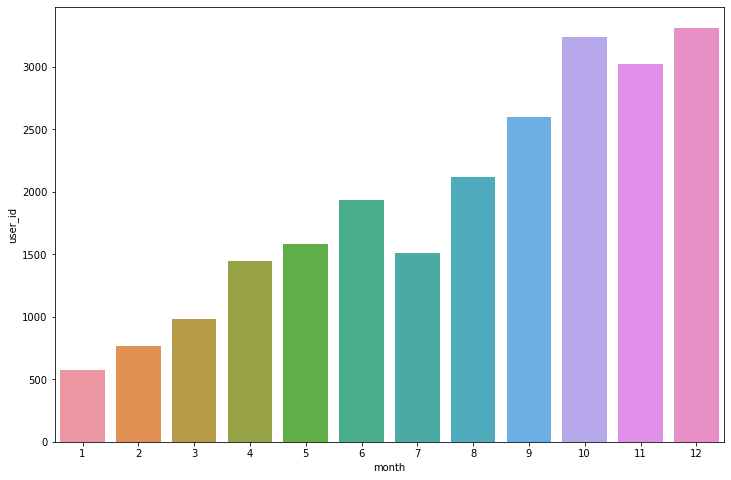

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'month', y = 'user_id', data = order_month)

In [21]:
taxi.groupby('weekday', as_index=False).agg({'user_id': 'count'})

,weekday,user_id
0,Friday,3332
1,Monday,4018
2,Saturday,3569
3,Sunday,3752
4,Thursday,3133
5,Tuesday,2965
6,Wednesday,2322


<AxesSubplot:xlabel='weekday', ylabel='user_id'>

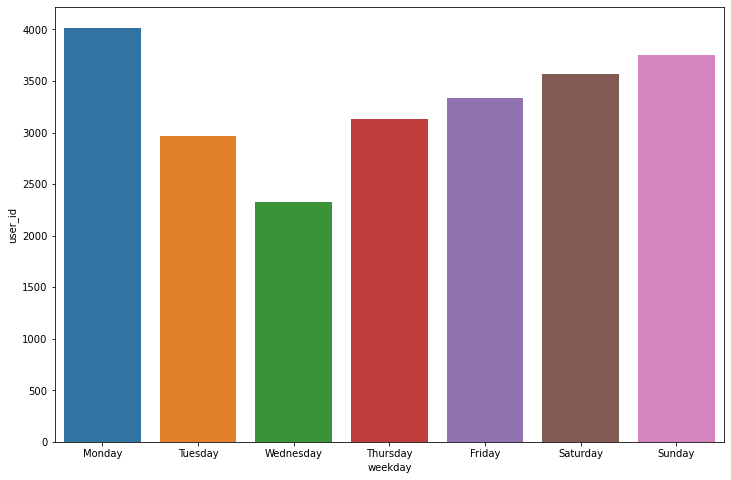

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'weekday',y = 'user_id',\
            data = taxi.groupby('weekday', as_index=False)\
                        .agg({'user_id': 'count'}),\
            order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday' ,'Saturday', 'Sunday' ])

## Даннные
journey_id – уникальный id поездки  
user_id – id пользователя  
driver_id – id водителя  
taxi_id – id машины  
icon – тип поездки  
start_type – тип заказа (asap, reserved, delayed)  
start_at – время начала поездки  
start_lat – исходное местоположение пользователя, широта  
start_lon – исходное местоположение пользователя, долгота  
end_at – время окончания поездки  
end_lat – итоговое местоположение, широта  
end_lon – итоговое местоположение, долгота  
end_state – состояние заказа  
driver_start_lat – исходное местоположение водителя, широта  
driver_start_lon – исходное местоположение водителя, долгота  
arrived_at – время прибытия водителя  
source – платформа, с которой сделан заказ  
driver_score – оценка водителя клиентом  
rider_score – оценка клиента водителем

In [23]:
taxi.end_state.unique()

array(['drop off', 'not found', 'rider cancel', 'driver cancel',
       'failure', nan, 'no show'], dtype=object)

In [24]:
mau = taxi.groupby('month', as_index=False).agg({'user_id' : 'nunique' })
mau

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


<AxesSubplot:xlabel='month', ylabel='user_id'>

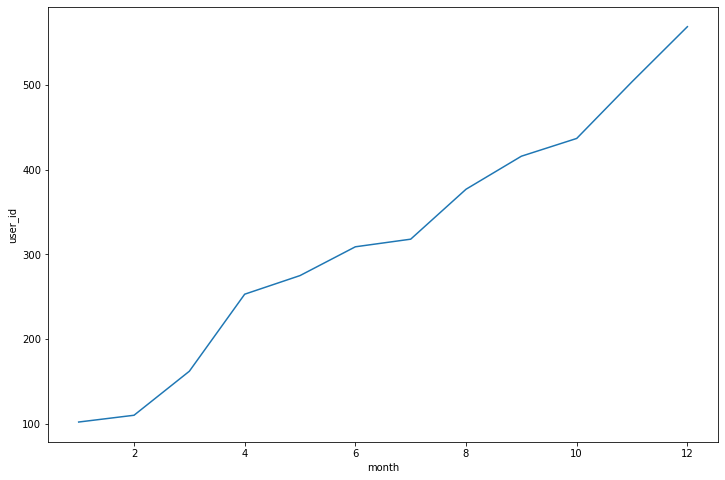

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='user_id', data = mau)